In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Input, BatchNormalization
from glob import glob

In [30]:
#path of the datasets
train = '/home/hasan/DATA SET/malaria dataset/train/'
test = '/home/hasan/DATA SET/malaria dataset/test/'
valid = '/home/hasan/DATA SET/malaria dataset/valid'


In [31]:
#class of train dataset
folder = glob('/home/hasan/DATA SET/cell-images-for-detecting-malaria/train/*')

# Model

In [32]:
base_model = VGG19(input_shape=(254,254,3), include_top=False, weights='imagenet')
x = base_model.output
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(300)(x)
x = Dense(350, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

In [33]:
#Summary of the model
model.summary()


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [34]:
#Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Data Preprocessing 

In [44]:
train_datagen = ImageDataGenerator(  
                      shear_range=0.2, 
                      zoom_range=0.2,
                      samplewise_center=True, 
                      samplewise_std_normalization=True,
                      horizontal_flip=True,                
                      rescale=1./255, 
                      )

valid_datagen = ImageDataGenerator(                
                      rescale=1./255)


test_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
#for train data
train_data_generator = train_datagen.flow_from_directory('/home/hasan/DATA SET/malaria dataset/train',
                                                  target_size=(254,254),
                                                  batch_size=32,
                                                  class_mode='categorical')

#for valid data
valid_data_generator = valid_datagen.flow_from_directory('/home/hasan/DATA SET/malaria dataset/valid',
                                                      target_size=(254,254),
                                                      batch_size=32,
                                                      class_mode='categorical'
                                                      )

#for test data
test_data_generator = test_datagen.flow_from_directory('/home/hasan/DATA SET/malaria dataset/test')


Found 27558 images belonging to 2 classes.
Found 2058 images belonging to 2 classes.
Found 25500 images belonging to 2 classes.


# Training the model

In [37]:
model_fit = model.fit_generator(generator=train_data_generator, 
              steps_per_epoch=len(train_data_generator),
              epochs=2,   
              validation_data=valid_data_generator, 
              validation_steps=len(valid_data_generator)
              )

Epoch 1/2
862/862 [==============================] - 4864s 6s/step - loss: 0.3267 - accuracy: 0.8791 - val_loss: 0.6756 - val_accuracy: 0.8785
Epoch 2/2
862/862 [==============================] - 4651s 5s/step - loss: 0.2148 - accuracy: 0.9186 - val_loss: 0.3499 - val_accuracy: 0.8858


# Accuracy and Validation Curve

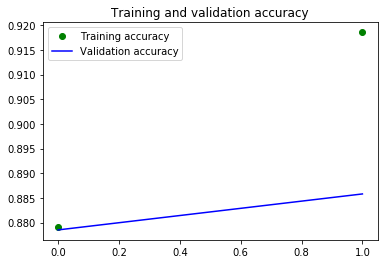

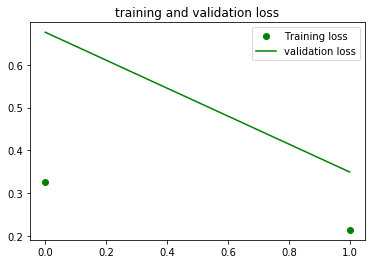

In [41]:
accuracy = model_fit.history['accuracy']
val_accuracy = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs = range(len(val_accuracy))
plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

# Evaluating with Test Data

In [ ]:
test_result = model.evaluate(test_data_generator)
print('Loss of the test data is :',test_result[0])
print('Accuracy of the test data is :',test_result[1])

# Predicting with Test Data

In [ ]:
#this is float value of the class
predicted = model.predict(flow_from_directory(test_data_generator))

#converting float value to integer value
predicted = np.argmax(np.round(predicted), axis=1)
print('Shape of predicted data :',predicted.shape)
print('Predicted values :',predicted)

Note: I don't run the full code becouse of my PC configuration.